# DRLND Project 2 - Continuous Control (Reacher environment)


### 1. Start the Environment



There are two versions of the Reacher environment: a single agent and 20 agents, where can be accessed at the file paths provided below.  

In [1]:
!pip -q install ./python

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
multiple_agents = True

if multiple_agents:
    # select this option to load version 2 (with 20 agents) of the environment
    env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
else:
    # select this option to load version 1 (with a single agent) of the environment
    env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
"""    
if multiple_agents:
    # select this option to load version 2 (with 20 agents) of the environment
    env = UnityEnvironment(file_name='./Environement/20Agents/Reacher_Windows_x86_64/Reacher.exe')
else:
    # select this option to load version 1 (with a single agent) of the environment
    env = UnityEnvironment(file_name='./Environement/1Agent/Reacher_Windows_x86_64/Reacher.exe')
"""

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. 

Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("Using {}".format(brain_name))

Using ReacherBrain


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
"""
state_vector_names = [
"pendulum1.localPosition",
"pendulum1.rotation     ",
"rb1.angularVelocity    ",
"rb1.velocity           ",
"pendulum2.localPosition",
"pendulum2.rotation     ",
"rb2.angularVelocity    ",
"rb2.velocity           ",
"goal.localPosition     ",
"hand.localPosition     ",
"goalSpeed              "]
"""

print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0].reshape((11, 3)))

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [[  0.00000000e+00  -4.00000000e+00   0.00000000e+00]
 [  1.00000000e+00  -0.00000000e+00  -0.00000000e+00]
 [ -4.37113883e-08   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.00000000e+01]
 [  0.00000000e+00   1.00000000e+00  -0.00000000e+00]
 [ -0.00000000e+00  -4.37113883e-08   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.75471878e+00]
 [ -1.00000000e+00   5.55726624e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00  -1.68164849e-01]]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.08499999810010195


In [7]:
flag = 0
if flag:
    env.close()

### 4. Training the Agents with Deep Deterministic Policy Gradients (DDPG)


In [8]:
import datetime
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

#### 4.1 Instantiate the Agent

In [9]:
from ddpg_agent import Agent

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0.00001  # L2 weight decay

agent = Agent(num_agents=num_agents,
               state_size=state_size, 
                action_size=action_size,  
                random_seed=0, BUFFER_SIZE = BUFFER_SIZE,
                BATCH_SIZE = BATCH_SIZE, GAMMA = GAMMA,
                TAU = TAU, LR_ACTOR = LR_ACTOR, 
                LR_CRITIC = LR_CRITIC, WEIGHT_DECAY = WEIGHT_DECAY)

#### 4.2 Train the Agent with DDPG

In [10]:
def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state,num_agents)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(state, action, rewards, next_state, BATCH_SIZE, num_agents, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                print('\tSteps: ', t)
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}\t{}'.format(i_episode, 
                                                                          np.mean(scores_deque), 
                                                                          np.mean(score),
                                                                          datetime.datetime.now()), end="")
        average_score = np.mean(scores_deque)
        if i_episode % 25 == 0 or average_score > 30:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 
            if average_score > 30:
                break
    return scores

Episode 25	Average Score: 6.08	Score: 26.342	2018-11-26 02:38:04.455423
Episode 50	Average Score: 21.24	Score: 37.427	2018-11-26 02:46:11.387633
Episode 75	Average Score: 26.71	Score: 38.041	2018-11-26 02:54:16.202546
Episode 100	Average Score: 29.49	Score: 37.642	2018-11-26 03:02:17.228222
Episode 102	Average Score: 30.22	Score: 37.774	2018-11-26 03:02:54.843323


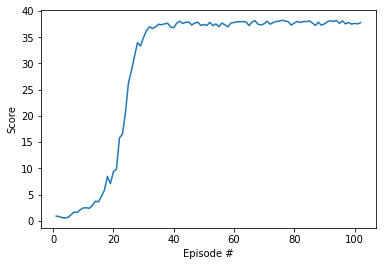

In [11]:
scores = ddpg()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### 4.3 Watch a Smart Agent

In [12]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

scores = []
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
agent.reset()   
while True:
    action = agent.act(states, num_agents)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations
    rewards = env_info.rewards
    dones = env_info.local_done
    states = next_states
    score += rewards
    if any(dones):
        break

When finished, you can close the environment.

In [13]:
env.close()